<a href="https://colab.research.google.com/github/raregem-AI/Pridicting-Solar-Power-with-Machine-Learning/blob/main/Telecom_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from tqdm import tqdm
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",500)

### Data Collection
Loading  the datasets into colab


In [ ]:
#Loading Dataset
path ="/content/drive/MyDrive/Data/"
data = pd.read_excel(path+"/Dataset-3.xlsx")

In [ ]:
data = pd.read_excel(path+"/Dataset-3.xlsx")

# The dataset available from the company contains the following information:



###✓ Customer ID: A unique identifier for each customer.

###✓ Name: The name of the customer.

###✓ Age: The age of the customer.

###✓ Gender: The gender of the customer.

###✓ Location: The location or city where the customer is based.

###✓ Email: The email address of the customer.

###✓ Phone: The phone number of the customer.

###✓ Address: The postal address of the customer.

###✓ Segment: The customer segment or category to which the customer belongs (e.g., Segment A, Segment B, Segment C).


#The dataset available from the company contains the following information:

###✓ Purchase History: A list of dictionaries representing the customer's purchase history. Each dictionary includes details about products purchased, purchase frequency, and purchase value.

###✓ Product: Product name.

###✓ Frequency: The number of times this product was purchased by the customer.

###✓ Value: Cost of  this product.

###✓ Subscription Details: A dictionary containing information about the customer's subscription plan, including the plan name, start date, and end date.

###✓ Plan: Name of the subscription plan.

###✓ Start Date: Start date of subscription plan.

###✓ End Date: End date of subscription plan.


# The dataset available from the company contains the following information:



###✓ Website Usage: A dictionary containing metrics related to the customer's usage of a website or app, including the number of page views and time spent (in minutes).

####✓ Page Views: The number of website page views from the customer.

###✓ Time Spent: Time spent on the website by a customer in minutes.

###✓ Clickstream Data: A list of dictionaries representing the customer's clickstream data, including actions such as clicks, searches, and adding items to the cart. Each dictionary includes the action type, the page where the action occurred, and a timestamp.

###✓ Action: Clickstream action of the user, could be Click, Search or Add to Car.

###✓ Page: The website page in which the user performed this action.

###✓ Timestamp: Timestamp of the clickstream action.


#The dataset available from the company contains the following information:



###✓ Engagement Metrics: A dictionary containing engagement metrics, such as the number of logins and the frequency of engagement (e.g., Daily, Weekly, Monthly).

###✓ Logins: The number of logins the user made.

### ✓ Frequency: How often a customer logs in to the platform. Could be Daily, Weekly or Monthly.

### ✓ Feedback: Feedback provided by the customer, including a rating (e.g., 1 to 5) and a comment.

###✓ Rating: A value between 1 and 5 that indicates the customer’s feedback rating.
.
###✓ Comment: The comment left by the customer for the feedback.


# The dataset available from the company contains the following information:



###✓ Marketing Communication: A list of dictionaries representing the customer's history of marketing communication, including dates when emails were sent, opened, and clicked.

###✓ Email Sent: Date when email was sent.

###✓ Email Opened: Date when email was opened.

###✓ Email Clicked: Date when email was clicked.


###✓ NPS: The Net Promoter Score (NPS) of the customer, which measures customer loyalty and satisfaction on a scale of 0 to 10.

###✓ Churn Label: A binary label indicating whether the customer has churned (1 for churn, 0 for no churn).

###✓ Timestamp: The timestamp indicating when the data was recorded for the customer.

# Aim and Objective
- The aim of this project is develop a robust model to predict customers that will churn
- To also gain insight of key features that help in retaining  customers
- To discover the underline pattern of customers that does not churn


In [ ]:
#dd = pd.read_excel("/content/drive/MyDrive/Data/Dataset-3.xlsx")

In [ ]:
!open "/content/Dataset-1.xlsx"

xdg-open: file '/content/Dataset-1.xlsx' does not exist


### Data Exploration Analysis(EDA)
The folllowing tasks will be carry out
- Understanding the datastructurestatistic, and quality of the data to gain insight
- visualizing the data to gain insights
- Checking for missing values



In [ ]:
#see the first five roles
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...","{'Plan': 'Smart', 'Start_Date': '2020-01-14', ...","[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28
4,1005,Christopher Rodriguez,68,Female,West James,shannonstrickland@example.org,+1-701-854-4915x724,"01169 Miller Mission\nWest Anthonyburgh, WY 47359",Segment C,"[{'Product': 'Ice Cream Novelties', 'Frequency...","{'Plan': 'Basic', 'Start_Date': '2021-04-08', ...","[{'Type': 'Call', 'Date': '2019-04-10'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 0}...","{'PageViews': 77, 'TimeSpent(minutes)': 51}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 12, 'Frequency': 'Weekly'}","{'Rating': 3, 'Comment': 'Ten determine unit i...","[{'Email_Sent': '2022-03-11', 'Email_Opened': ...",3,0,2019-04-05 22:42:22


### Checking for mossing values

In [ ]:
missing_values = data.isnull().sum()
missing_values

CustomerID                0
Name                      0
Age                       0
Gender                    0
Location                  0
Email                     0
Phone                     0
Address                   0
Segment                   0
PurchaseHistory           0
SubscriptionDetails       0
ServiceInteractions       0
PaymentHistory            0
WebsiteUsage              0
ClickstreamData           0
EngagementMetrics         0
Feedback                  0
MarketingCommunication    0
NPS                       0
ChurnLabel                0
Timestamp                 0
dtype: int64

### Checking for duplicates

In [ ]:
df_duplicated = data.duplicated().any()
df_duplicated



False

### Get a statistical overview of the numerical columns in the dataset

In [ ]:
stats_overview = data.describe()
stats_overview

,CustomerID,Age,NPS,ChurnLabel
count,12483.00000,12483.000000,12483.000000,12483.000000
mean,7242.00000,43.930065,2.973884,0.505808
std,3603.67604,15.341521,2.644623,0.499986
min,1001.00000,18.000000,0.000000,0.000000
25%,4121.50000,31.000000,1.000000,0.000000
50%,7242.00000,44.000000,2.000000,1.000000
75%,10362.50000,57.000000,4.000000,1.000000
max,13483.00000,70.000000,9.000000,1.000000


### The  target variables ChurnLabel,and othe variables distribution

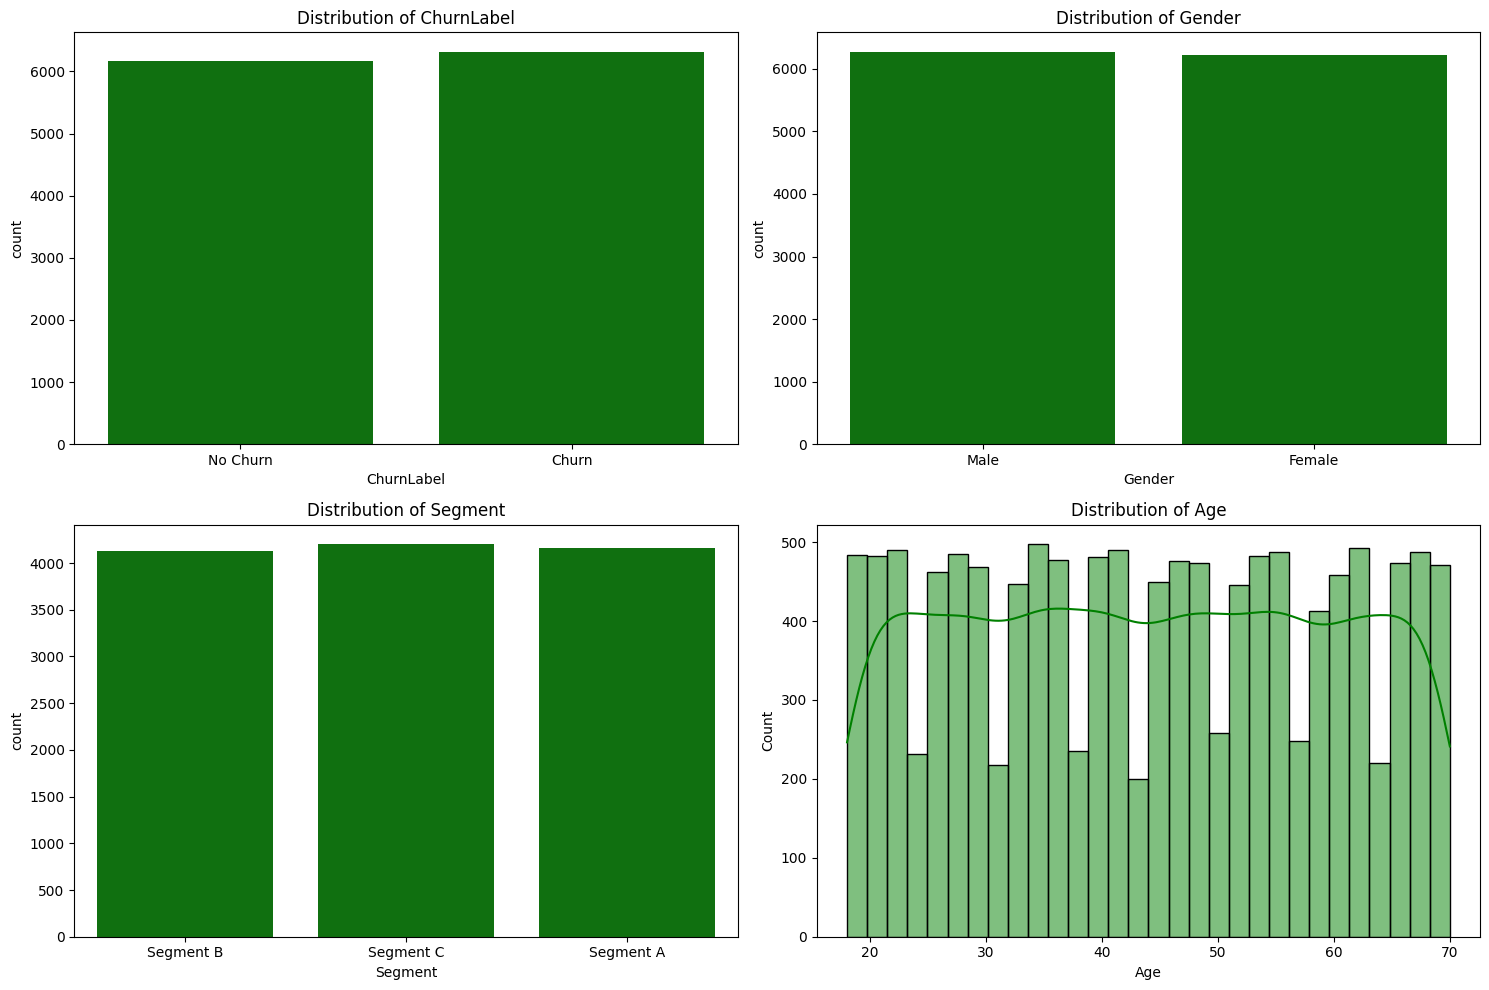

In [ ]:
# setup the figure and axes
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
# plot the distribution of the target variables
sns.countplot(x='ChurnLabel',color='green', data=data, ax=ax[0, 0])
ax[0, 0].set_title('Distribution of ChurnLabel')
ax[0,0].set_xticklabels(['No Churn', 'Churn'])

# Plot distrinution of the Gender
sns.countplot(x='Gender',color='green', data=data, ax=ax[0, 1])
ax[0, 1].set_title('Distribution of Gender')

# distribution of the segment
sns.countplot(x='Segment',color='green', data=data, ax=ax[1, 0])
ax[1, 0].set_title('Distribution of Segment')

#Age distribution
sns.histplot(data['Age'],color='green', bins=30, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Distribution of Age')

plt.tight_layout()
plt.show()

### Correlation Analysis: which columns correlates with the target variable, ChurnLabel

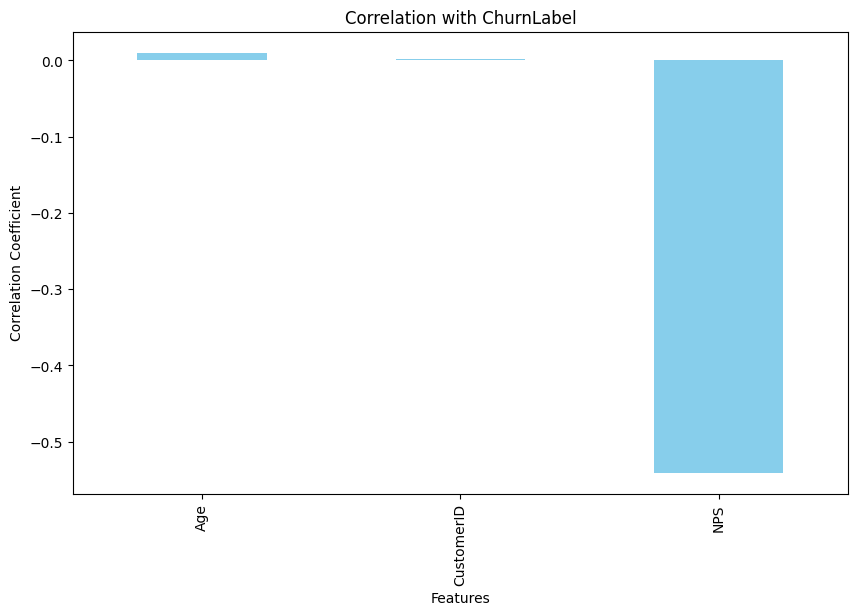

ChurnLabel    1.000000
Age           0.010273
CustomerID    0.001530
NPS          -0.540703
Name: ChurnLabel, dtype: float64

In [ ]:
# Calculationg correlation with churnLabel
correlation =data.select_dtypes(include=np.number).corr()['ChurnLabel'].sort_values(ascending=False)
#plot the correlation
plt.figure(figsize=(10,6))
correlation.drop('ChurnLabel').plot(kind='bar',color='skyblue')
plt.title('Correlation with ChurnLabel')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.show()
correlation



### Exploring the nested columns

In [ ]:
# List out all the nested columns
nested_columns =[
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'


]

#Print out the first value in each of the columns
w1, w2 = 25, 1000
for col in nested_columns:
  row  =[col,data[col][0]]
  print('\n| {:<{w1}} | {:<{w2}} |'.format(*row, w1=w1, w2=w2))





| PurchaseHistory           | [{'Product': 'Frozen Cocktail Mixes', 'Frequency': 8, 'Value': 884.43}, {'Product': 'Printer, Copier & Fax Machine Accessories', 'Frequency': 7, 'Value': 397.14}, {'Product': 'Hockey Stick Care', 'Frequency': 10, 'Value': 498.92}, {'Product': 'Guacamole', 'Frequency': 2, 'Value': 718.43}, {'Product': 'Mortisers', 'Frequency': 2, 'Value': 614.08}, {'Product': 'Rulers', 'Frequency': 6, 'Value': 221.68}, {'Product': 'Invitations', 'Frequency': 3, 'Value': 660.04}]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

### Temporary Analysis.Here, we take a look at how the Churn rate changes over time, to see if there are any recurriing patterns


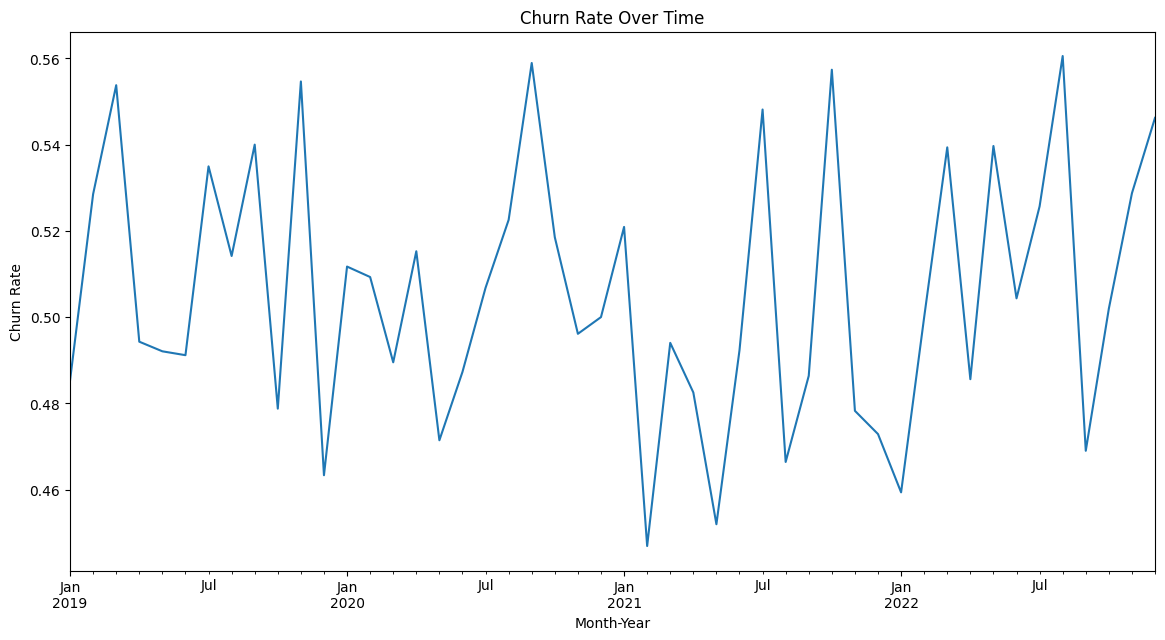

In [ ]:
# Convert theTimeStamp to datetime format so that it can be grouped
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
# Extract the month and year
data['MonthYear'] = data['Timestamp'].dt.to_period('M')
#data['Year'] = data['Timestamp'].dt.strftime('%Y')
#Group by MonthYear and calculate the churn rates
monthly_churn_rate = data.groupby('MonthYear')['ChurnLabel'].mean()
#plot the churn rate over time
plt.figure(figsize=(14, 7))
monthly_churn_rate.plot()
plt.title('Churn Rate Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Churn Rate')
plt.show()


### We also need to see if there are patterns between the customer feedback Rating and Churlabel

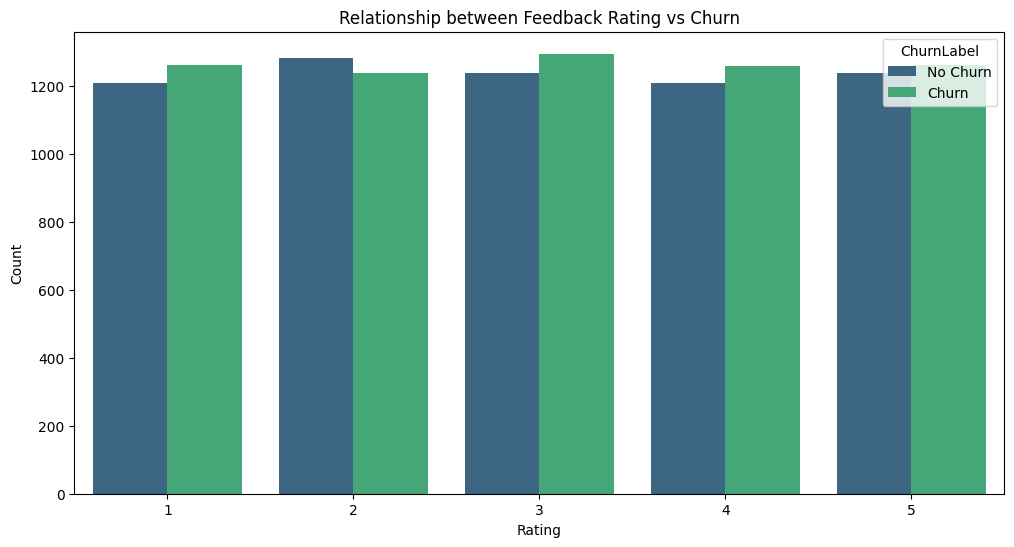

In [ ]:
#Extrac the rating from the Feedback column and creating a new column for it
data['FeedbackRating'] = data['Feedback'].apply(lambda x: eval(x)['Rating'])
# Plotting the raleationship between feedback rating and churn
plt.figure(figsize=(12,6))
sns.countplot(x='FeedbackRating', data=data, hue='ChurnLabel', palette='viridis')
plt.title('Relationship between Feedback Rating vs Churn')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='ChurnLabel', loc='upper right',labels=['No Churn','Churn'])
plt.show()
#data['Rating'] = data['Feedback'].str.extract(r'(:\s).?([\w\s]*)')[1].str.strip()

#### Insight:
- From the visual, there doesn't seem to be any indication that the Feedback rating affects the ChurnLabel

### Data Preprocessing and Feature Engineering
Here, we will do
- Create new features that may have predictive power
- Convert categorical variables to numeric variables, using encoding techniques
- Scale or normalize numeric variable if necessary
-split  the data into  training and testing subsets
- Remove irrelevant features

We begin by converting nested values from string format to lists/dictionaries using 'literal_eval' function

In [ ]:
#import literal_eval function
from ast import literal_eval

In [ ]:
# List nested coluns
nested_columns =[
    'PurchaseHistory',
    'SubscriptionDetails',
    'ServiceInteractions',
    'PaymentHistory',
    'WebsiteUsage',
    'ClickstreamData',
    'EngagementMetrics',
    'Feedback',
    'MarketingCommunication'


]

# Apply the literal_eval function
for feature in nested_columns:
  data[feature] = data[feature].apply(literal_eval)

In [ ]:
data['WebsiteUsage'].value_counts()

WebsiteUsage
{'PageViews': 85, 'TimeSpent(minutes)': 3}     9
{'PageViews': 85, 'TimeSpent(minutes)': 13}    8
{'PageViews': 95, 'TimeSpent(minutes)': 21}    8
{'PageViews': 81, 'TimeSpent(minutes)': 25}    8
{'PageViews': 63, 'TimeSpent(minutes)': 35}    8
                                              ..
{'PageViews': 60, 'TimeSpent(minutes)': 14}    1
{'PageViews': 85, 'TimeSpent(minutes)': 57}    1
{'PageViews': 32, 'TimeSpent(minutes)': 49}    1
{'PageViews': 57, 'TimeSpent(minutes)': 69}    1
{'PageViews': 71, 'TimeSpent(minutes)': 66}    1
Name: count, Length: 6248, dtype: int64

More features  will beextracted from the dataset

In [ ]:
# PurchaseHistory
data['PurchaseProducts'] = data['PurchaseHistory'].apply(lambda x: '|'.join(i['Product'] for i in x))
data['PurchaseFrequency'] = data['PurchaseHistory'].apply(lambda x: sum(i['Frequency'] for i in x))
data['PurchaseValue'] = data['PurchaseHistory'].apply(lambda x: sum(i['Value'] for i in x))

#SubscriptionDetails
data['SubscriptionPlan'] = data['SubscriptionDetails'].apply(lambda x: x['Plan'])
data['SubscriptionStartDate'] = data['SubscriptionDetails'].apply(lambda x: x['Start_Date'])
data['SubscriptionEndDate'] = data['SubscriptionDetails'].apply(lambda x: x['End_Date'])
data['SubscriptionDuration'] = (pd.to_datetime(data['SubscriptionEndDate']) - pd.to_datetime(data['SubscriptionStartDate'])).dt.days

# WebssiteUsage
data['WebsitePageViews'] = data['WebsiteUsage'].apply(lambda x: x['PageViews'])
data['WebsiteTimeSpent'] = data['WebsiteUsage'].apply(lambda x: x['TimeSpent(minutes)'])

#EngagementMetrics
data['EngagementMetricsLogins'] = data['EngagementMetrics'].apply(lambda x: x['Logins'])
data['EngagementMetricsFrequency'] = data['EngagementMetrics'].apply(lambda x: x['Frequency'])
#Feedback
data['FeedbackRating'] = data['Feedback'].apply(lambda x: x['Rating'])
data['FeedbackComment'] = data['Feedback'].apply(lambda x: x['Comment'])

#MarketingCommunication
data['MarketingCommunicationEmails'] = data['MarketingCommunication'].apply(lambda x: len(x))
data['MarketingCommunicationOpenClickDiff'] = data['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Clicked'])\
         - pd.to_datetime(i['Email_Opened'])).days for i in x

    ]))

data['MarketingCommunicationEmailSentOpenDiff'] = data['MarketingCommunication'].apply(
    lambda x: np.mean([
        (pd.to_datetime(i['Email_Opened'])\
         - pd.to_datetime(i['Email_Sent'])).days for i in x

    ]))


Special extraction from three columns
- ServiceInteraction
- PaymentHistory
- ClickstreatmentDats

In [ ]:
# Get all unique ServiceInteraction 'Types'
service_interaction_types = data['ServiceInteractions'].apply(lambda x: list(set([i['Type'] for i in x])))
service_interaction_types = service_interaction_types.to_list()
unique_service_interaction_types = []
for i in service_interaction_types:
  unique_service_interaction_types.extend(i)
unique_service_interaction_types = list(set(unique_service_interaction_types))
print("All unique servvice Interaction Type:",unique_service_interaction_types)

#Get all uniquePymentHistory 'Method'
payment_history_methods = data['PaymentHistory'].apply(lambda x: list(set([i['Method'] for i in x])))
payment_history_methods = payment_history_methods.to_list()
unique_payment_history_methods = []
for i in payment_history_methods:
  unique_payment_history_methods.extend(i)
unique_payment_history_methods = list(set(unique_payment_history_methods))
print("All unique Payment History Method:",unique_payment_history_methods)

#Get all unique ClicksstreamDate 'Action'
clickstream_data_actions = data['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
# clickstream_data_actions = data['ClickstreamData'].apply(lambda x: list(set([i['Action'] for i in x])))
clickstream_data_actions = clickstream_data_actions.to_list()
unique_clickstream_data_actions = []
for i in clickstream_data_actions:
  unique_clickstream_data_actions.extend(i)
unique_clickstream_data_actions = list(set(unique_clickstream_data_actions))
print("All unique Clickstream Data Action:",unique_clickstream_data_actions)

All unique servvice Interaction Type: ['Call', 'Chat', 'Email']
All unique Payment History Method: ['Credit Card', 'Bank Transfer', 'PayPal']
All unique Clickstream Data Action: ['Add to Cart', 'Search', 'Click']


From these three columns, we are are going to encoding more

In [ ]:
# ServiceIteraction
for usit in unique_service_interaction_types:
  data[f'ServiceInteractions_{usit}']= data['ServiceInteractions'].apply(lambda x: len([i for i in x if i['Type'] == usit]))

#PaymentHistory
data['PaymentHistoryNoOfLatePayments'] = data['PaymentHistory'].apply(lambda x: sum(i['Late_Payments'] for i in x))
data['PaymentHistoryAvgNoOfLatePayments'] = data['PaymentHistory'].apply(lambda x: np.mean([i['Late_Payments'] for i in x]))

#ClickstreamData
for action in unique_clickstream_data_actions:
  data[f'ClickstreamData_{action}']= data['ClickstreamData'].apply(lambda x: len([i for i in x if i['Action'] == action]))

To see a subset of the data

In [ ]:
data.head()

,CustomerID,Name,Age,Gender,Location,Email,Phone,Address,Segment,PurchaseHistory,SubscriptionDetails,ServiceInteractions,PaymentHistory,WebsiteUsage,ClickstreamData,EngagementMetrics,Feedback,MarketingCommunication,NPS,ChurnLabel,Timestamp,MonthYear,FeedbackRating,PurchaseProducts,PurchaseFrequency,PurchaseValue,SubscriptionPlan,SubscriptionStartDate,SubscriptionEndDate,SubscriptionDuration,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackComment,MarketingCommunicationEmails,MarketingCommunicationOpenClickDiff,MarketingCommunicationEmailSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,PaymentHistoryAvgNoOfLatePayments,ClickstreamData_Add to Cart,ClickstreamData_Search,ClickstreamData_Click
0,1001,Mark Barrett,31,Male,Andrewfort,allison74@example.net,3192528777,"61234 Shelley Heights Suite 467\nCohentown, GU...",Segment B,"[{'Product': 'Frozen Cocktail Mixes', 'Frequen...","{'Plan': 'Express', 'Start_Date': '2020-06-08'...","[{'Type': 'Call', 'Date': '2019-09-26'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 5}...","{'PageViews': 49, 'TimeSpent(minutes)': 15}","[{'Action': 'Add to Cart', 'Page': 'register',...","{'Logins': 19, 'Frequency': 'Weekly'}","{'Rating': 1, 'Comment': 'I move baby go small...","[{'Email_Sent': '2019-10-17', 'Email_Opened': ...",3,1,2020-01-27 01:36:49,2020-01,1,"Frozen Cocktail Mixes|Printer, Copier & Fax Ma...",38,3994.72,Express,2020-06-08,2022-10-27,871,49,15,19,Weekly,I move baby go small big. Office institution s...,8,319.0,818.0,1,2,1,40,13.333333,8,12,4
1,1002,Jeremy Welch,66,Female,Millerhaven,fmiller@example.com,231-587-1818x8651,"4959 Jennifer Junction\nNew Angelaport, TN 87397",Segment C,"[{'Product': 'Watercraft Polishes', 'Frequency...","{'Plan': 'Pro', 'Start_Date': '2021-07-21', 'E...","[{'Type': 'Call', 'Date': '2020-01-05'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 3}...","{'PageViews': 100, 'TimeSpent(minutes)': 9}","[{'Action': 'Add to Cart', 'Page': 'homepage',...","{'Logins': 9, 'Frequency': 'Weekly'}","{'Rating': 2, 'Comment': 'Wish what bag cut li...","[{'Email_Sent': '2021-08-02', 'Email_Opened': ...",6,0,2019-01-06 18:30:03,2019-01,2,Watercraft Polishes|Baby Protective Wear|Footbags,4,2844.35,Pro,2021-07-21,2022-05-07,290,100,9,9,Weekly,Wish what bag cut life. Statement might opport...,9,88.0,110.0,5,4,10,10,3.333333,8,7,9
2,1003,Brandon Patel,36,Female,Lozanostad,jasonbrown@example.org,(270)633-9095,"38701 Amanda Brook Apt. 076\nKimshire, NJ 62516",Segment B,"[{'Product': 'Vehicle Waxes, Polishes & Protec...","{'Plan': 'Essential', 'Start_Date': '2019-10-0...","[{'Type': 'Email', 'Date': '2019-10-09'}, {'Ty...","[{'Method': 'Credit Card', 'Late_Payments': 1}...","{'PageViews': 1, 'TimeSpent(minutes)': 97}","[{'Action': 'Search', 'Page': 'terms', 'Timest...","{'Logins': 19, 'Frequency': 'Monthly'}","{'Rating': 4, 'Comment': 'Some Democrat guess ...","[{'Email_Sent': '2021-08-29', 'Email_Opened': ...",3,0,2019-04-30 04:25:10,2019-04,4,"Vehicle Waxes, Polishes & Protectants|Pipe Cap...",14,1866.52,Essential,2019-10-05,2020-08-19,319,1,97,19,Monthly,Some Democrat guess but short. Whether behind ...,8,117.0,333.0,1,1,1,8,2.666667,2,7,3
3,1004,Tina Martin,62,Female,South Dustin,matthew62@example.net,050.081.8706x11982,"67324 Ashley Coves\nSouth John, RI 29650",Segment C,"[{'Product': 'Mouthwash', 'Frequency': 5, 'Val...","{'Plan': 'Smart', 'Start_Date': '2020-01-14', ...","[{'Type': 'Call', 'Date': '2020-08-28'}, {'Typ...","[{'Method': 'Credit Card', 'Late_Payments': 36...","{'PageViews': 25, 'TimeSpent(minutes)': 31}","[{'Action': 'Click', 'Page': 'privacy', 'Times...","{'Logins': 4, 'Frequency': 'Daily'}","{'Rating': 1, 'Comment': 'Yard feel never miss...","[{'Email_Sent': '2021-02-03', 'Email_Opened': ...",1,1,2020-03-03 17:33:28,2020-03,1,Mouthwash|Crêpe & Blini Pans|Vehicle Performan...,28,1378.64,Smart,2020-01-14,2022-03-27,803,25,31,4,Dail

See all the columns

In [ ]:
data.columns

Index(['CustomerID', 'Name', 'Age', 'Gender', 'Location', 'Email', 'Phone',
       'Address', 'Segment', 'PurchaseHistory', 'SubscriptionDetails',
       'ServiceInteractions', 'PaymentHistory', 'WebsiteUsage',
       'ClickstreamData', 'EngagementMetrics', 'Feedback',
       'MarketingCommunication', 'NPS', 'ChurnLabel', 'Timestamp', 'MonthYear',
       'FeedbackRating', 'PurchaseProducts', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'SubscriptionStartDate',
       'SubscriptionEndDate', 'SubscriptionDuration', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackComment',
       'MarketingCommunicationEmails', 'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationEmailSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'PaymentHistoryAvgNoOfLatePayments',
       'ClickstreamData_Add to Ca

Pick out relevant columns

In [ ]:
df_ = data[[
    'Age',
    'Gender',
    'NPS',
    'ChurnLabel',
    'PurchaseFrequency',
    'PurchaseValue',
    'SubscriptionPlan',
    'WebsitePageViews',
    'WebsiteTimeSpent',
    'EngagementMetricsLogins',
    'EngagementMetricsFrequency',
    'FeedbackRating',
    #'FeedbackComment',
    'MarketingCommunicationEmails',
    'MarketingCommunicationOpenClickDiff',
    'MarketingCommunicationEmailSentOpenDiff',
    'ServiceInteractions_Call',
    'ServiceInteractions_Chat',
    'ServiceInteractions_Email',
    'PaymentHistoryNoOfLatePayments',
    'ClickstreamData_Click',
    'ClickstreamData_Search',
    'ClickstreamData_Add to Cart',
    'SubscriptionDuration'

]]

In [ ]:
df_.head()

,Age,Gender,NPS,ChurnLabel,PurchaseFrequency,PurchaseValue,SubscriptionPlan,WebsitePageViews,WebsiteTimeSpent,EngagementMetricsLogins,EngagementMetricsFrequency,FeedbackRating,MarketingCommunicationEmails,MarketingCommunicationOpenClickDiff,MarketingCommunicationEmailSentOpenDiff,ServiceInteractions_Call,ServiceInteractions_Chat,ServiceInteractions_Email,PaymentHistoryNoOfLatePayments,ClickstreamData_Click,ClickstreamData_Search,ClickstreamData_Add to Cart,SubscriptionDuration
0,31,Male,3,1,38,3994.72,Express,49,15,19,Weekly,1,8,319.0,818.0,1,2,1,40,4,12,8,871
1,66,Female,6,0,4,2844.35,Pro,100,9,9,Weekly,2,9,88.0,110.0,5,4,10,10,9,7,8,290
2,36,Female,3,0,14,1866.52,Essential,1,97,19,Monthly,4,8,117.0,333.0,1,1,1,8,3,7,2,319
3,62,Female,1,1,28,1378.64,Smart,25,31,4,Daily,1,10,423.0,159.0,17,24,18,79,16,16,15,803
4,68,Female,3,0,39,2425.05,Basic,77,51,12,Weekly,3,7,96.0,193.0,4,1,5,2,9,4,17,580


In [ ]:
df_['PaymentHistoryNoOfLatePayments'].unique()

array([ 40,  10,   8,  79,   2,  73,  50,  91,  12,   6,  65,  72,   9,
        64,   7,  70,  80,  11,  74,  60,  53,  59,   3,  34,  71,   5,
        55,  49,  57,  63,  26,  51,  67,  69,  58,  75,  52,  84,  61,
        56,  76,  62,   4,  97, 106,  47,  93,  24,  33,  77,  66,  37,
        13,  68,  36,  48,  41,  27,  78,  38,  39,  45,  87,  54,  46,
        86,   1,  81, 109, 108,  82,  88,  21,  30,   0,  85,  31,  35,
        42,  17,  98, 102,  83,  92, 105,  95,  14,  44,  16,  89,  90,
       104, 100,  32,  43, 107, 101,  28,  22,  99,  96,  15,  23,  94,
       114,  18,  25,  19, 103,  29,  20, 112, 110, 111, 113, 115, 117])

Let's see the names of all the columns we have now

In [ ]:
df_.columns

Index(['Age', 'Gender', 'NPS', 'ChurnLabel', 'PurchaseFrequency',
       'PurchaseValue', 'SubscriptionPlan', 'WebsitePageViews',
       'WebsiteTimeSpent', 'EngagementMetricsLogins',
       'EngagementMetricsFrequency', 'FeedbackRating',
       'MarketingCommunicationEmails', 'MarketingCommunicationOpenClickDiff',
       'MarketingCommunicationEmailSentOpenDiff', 'ServiceInteractions_Call',
       'ServiceInteractions_Chat', 'ServiceInteractions_Email',
       'PaymentHistoryNoOfLatePayments', 'ClickstreamData_Click',
       'ClickstreamData_Search', 'ClickstreamData_Add to Cart',
       'SubscriptionDuration'],
      dtype='object')

In [ ]:
df_.loc[0]

Age                                             31
Gender                                        Male
NPS                                              3
ChurnLabel                                       1
PurchaseFrequency                               38
PurchaseValue                              3994.72
SubscriptionPlan                           Express
WebsitePageViews                                49
WebsiteTimeSpent                                15
EngagementMetricsLogins                         19
EngagementMetricsFrequency                  Weekly
FeedbackRating                                   1
MarketingCommunicationEmails                     8
MarketingCommunicationOpenClickDiff          319.0
MarketingCommunicationEmailSentOpenDiff      818.0
ServiceInteractions_Call                         1
ServiceInteractions_Chat                         2
ServiceInteractions_Email                        1
PaymentHistoryNoOfLatePayments                  40
ClickstreamData_Click          

Let's check for number of unique values

In [ ]:
print('Total dataset lenght:', len(df_))
df_[['Gender','SubscriptionPlan','EngagementMetricsFrequency']].nunique()


Total dataset lenght: 12483


Gender                         2
SubscriptionPlan              20
EngagementMetricsFrequency     3
dtype: int64

### Encoding the string parameter

In [ ]:

# Gender encoding
gender_map = {'Male': 0, 'Female': 1}


#SubscriptionPlan encoding
unique_subscription_plans = df_['SubscriptionPlan'].unique()
subscription_plan_map = {unique_subscription_plans[i]: i for i  in range(len(unique_subscription_plans))}

#EngagementMetricsFrequency encoding
unique_engagement_metrics_frequency = df_['EngagementMetricsFrequency'].unique()
engagement_metrics_frequency_map = {unique_engagement_metrics_frequency[i]: i for i in range(len(unique_engagement_metrics_frequency))}
#Encode
df_.loc[:,'Gender'] = df_.loc[:,'Gender'].map(gender_map)
df_.loc[:,'SubscriptionPlan'] = df_.loc[:,'SubscriptionPlan'].map(subscription_plan_map)
df_.loc[:,'EngagementMetricsFrequency'] = df_.loc[:,'EngagementMetricsFrequency'].map(engagement_metrics_frequency_map)

In [ ]:
df_.loc[0]

Age                                             31
Gender                                           0
NPS                                              3
ChurnLabel                                       1
PurchaseFrequency                               38
PurchaseValue                              3994.72
SubscriptionPlan                                 0
WebsitePageViews                                49
WebsiteTimeSpent                                15
EngagementMetricsLogins                         19
EngagementMetricsFrequency                       0
FeedbackRating                                   1
MarketingCommunicationEmails                     8
MarketingCommunicationOpenClickDiff          319.0
MarketingCommunicationEmailSentOpenDiff      818.0
ServiceInteractions_Call                         1
ServiceInteractions_Chat                         2
ServiceInteractions_Email                        1
PaymentHistoryNoOfLatePayments                  40
ClickstreamData_Click          

In [ ]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12483 entries, 0 to 12482
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Age                                      12483 non-null  int64  
 1   Gender                                   12483 non-null  object 
 2   NPS                                      12483 non-null  int64  
 3   ChurnLabel                               12483 non-null  int64  
 4   PurchaseFrequency                        12483 non-null  int64  
 5   PurchaseValue                            12483 non-null  float64
 6   SubscriptionPlan                         12483 non-null  object 
 7   WebsitePageViews                         12483 non-null  int64  
 8   WebsiteTimeSpent                         12483 non-null  int64  
 9   EngagementMetricsLogins                  12483 non-null  int64  
 10  EngagementMetricsFrequency               12483

Plot correlation matrix

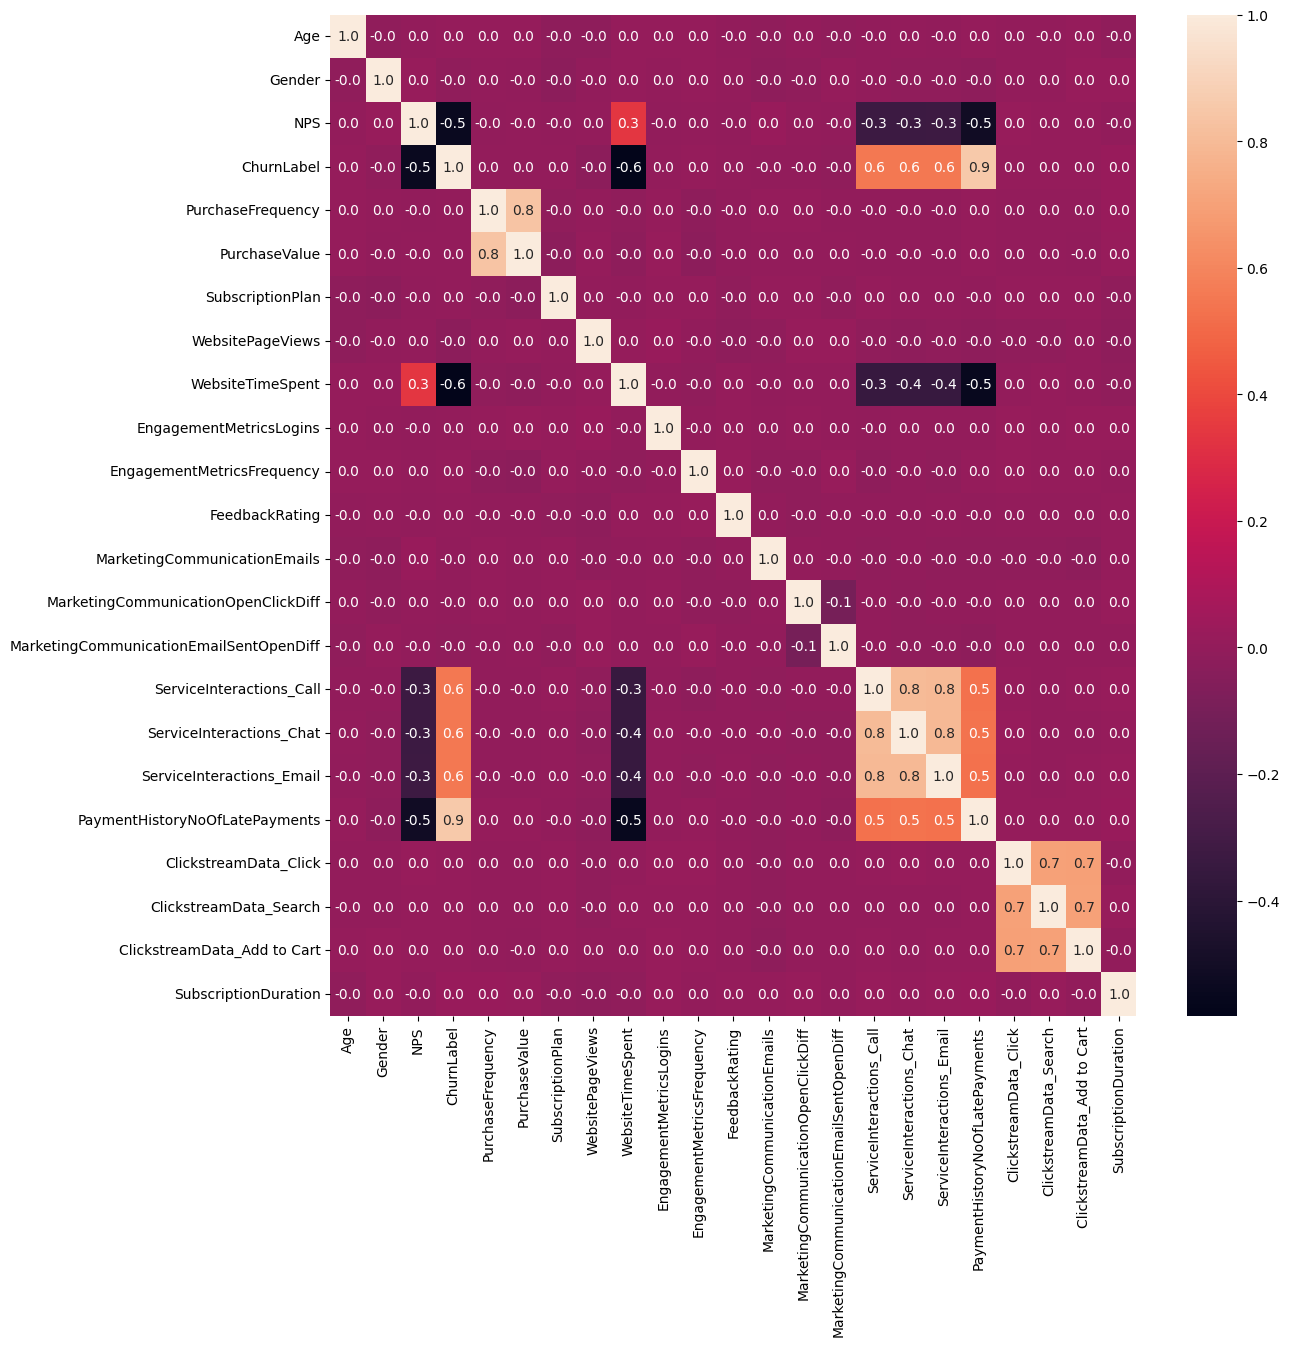

In [ ]:
df_corr = df_.corr()
fig,ax = plt.subplots(figsize=(13,13))
sns.heatmap(df_corr, annot=True,fmt='.1f',ax=ax)
plt.show()

In [ ]:
# # Convert relevant columns to numeric type
# for col in df_.columns:
#     if df_[col].dtype == 'object': # Check if the column is of object type (likely string)
#         try:
#             df_[col] = pd.to_numeric(df_[col], errors='coerce') # Convert to numeric, replace non-convertible values with NaN
#         except:
#             print(f"Could not convert column {col} to numeric")

# # Calculate the correlation matrix
# df_corr = df_.corr()

# # Proceed with plotting the heatmap
# fig,ax = plt.subplots(figsize=(13,13))
# sns.heatmap(df_corr, annot=True,fmt='.2f',ax=ax)
# plt.show()

### The data into train and validation set

In [ ]:
X = df_.drop(columns=['ChurnLabel'])
y = df_['ChurnLabel']
X_train, X_other, y_train, y_other = train_test_split(X, y, train_size=0.8, random_state=42) # Fixed order of returned values
X_test, X_val, y_test, y_val = train_test_split(X_other, y_other, test_size=0.3, random_state=42)

In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)
X_test= ss.transform(X_test)

## Data Modelling and Evaluation

##### Four differents models for modelling
- LogistRegression
- DescisionTreeClassifier
- XGBoost
- CatBoost
##### Metrics
- Acuracy score
- Precission score
- Recall score
- F1 score


In [ ]:
def evaluate(X,y,model, subset=''):
  y_prd = model.predict(X)

  print(f'{subset} Accuracy Score: {accuracy_score(y_prd,y)}')

  print(f'{subset} Precission Score: {precision_score(y_prd,y)}')

  print(f'{subset} Recall Score: {recall_score(y_prd,y)}')

  print(f'{subset} F1 Score: {f1_score(y_prd,y)}')


### Modelling with Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

#Evaluate the modedl on train and validation
evaluate(X_train,y_train,lr,'Train')

evaluate(X_val,y_val,lr,'Validation')
#evaluate(X_test,y_test,lr,'Test')


Train Accuracy Score: 0.9709593430803124
Train Precission Score: 0.965938176806458
Train Recall Score: 0.9767071471232331
Train F1 Score: 0.9712928133042962
Validation Accuracy Score: 0.968
Validation Precission Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


###Modelling with Decision Tree

In [ ]:
dt =DecisionTreeClassifier(max_depth=5)
dt.fit(X_train,y_train)

#Evaluate the modedl on train and validation
evaluate(X_train, y_train,dt, 'Train')
evaluate(X_val,  y_val,dt,  'Validation')

Train Accuracy Score: 0.9768676146605247
Train Precission Score: 0.9769639692852924
Train Recall Score: 0.9775413711583925
Train F1 Score: 0.9772525849335302
Validation Accuracy Score: 0.968
Validation Precission Score: 0.9696969696969697
Validation Recall Score: 0.9643835616438357
Validation F1 Score: 0.967032967032967


### Modelling with XGBoost


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(max_depth=5)
xgb.fit(X_train,y_train)
evaluate(X_train,y_train,xgb,'Train')
evaluate(X_val,y_val,xgb,'Validation')

Train Accuracy Score: 0.9993991588223513
Train Precission Score: 0.9994093325457767
Train Recall Score: 0.9994093325457767
Train F1 Score: 0.9994093325457767
Validation Accuracy Score: 0.9693333333333334
Validation Precission Score: 0.9724517906336089
Validation Recall Score: 0.9644808743169399
Validation F1 Score: 0.9684499314128944


### Modelling with Catboost

In [ ]:
!pip install CatBoost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.5 MB/s eta 0:00:00


In [ ]:
import catboost as cb
from catboost import CatBoostClassifier

In [ ]:
cb = CatBoostClassifier(max_depth=5)
cb.fit(X_train,y_train)
evaluate(X_train,y_train,cb,'Train')
evaluate(X_val,y_val,cb,'Validation')

Learning rate set to 0.027522
0:	learn: 0.6462701	total: 53.3ms	remaining: 53.2s
1:	learn: 0.6037734	total: 59ms	remaining: 29.4s
2:	learn: 0.5659453	total: 64.3ms	remaining: 21.4s
3:	learn: 0.5291724	total: 69.6ms	remaining: 17.3s
4:	learn: 0.4957278	total: 76.1ms	remaining: 15.1s
5:	learn: 0.4646429	total: 83.9ms	remaining: 13.9s
6:	learn: 0.4363147	total: 89.4ms	remaining: 12.7s
7:	learn: 0.4103339	total: 95.9ms	remaining: 11.9s
8:	learn: 0.3864893	total: 102ms	remaining: 11.2s
9:	learn: 0.3645937	total: 108ms	remaining: 10.7s
10:	learn: 0.3454385	total: 117ms	remaining: 10.5s
11:	learn: 0.3288313	total: 124ms	remaining: 10.2s
12:	learn: 0.3125635	total: 130ms	remaining: 9.89s
13:	learn: 0.2966860	total: 137ms	remaining: 9.67s
14:	learn: 0.2825254	total: 144ms	remaining: 9.42s
15:	learn: 0.2693630	total: 150ms	remaining: 9.2s
16:	learn: 0.2576978	total: 156ms	remaining: 9.04s
17:	learn: 0.2470215	total: 162ms	remaining: 8.85s
18:	learn: 0.2372475	total: 168ms	remaining: 8.67s
19:	le

### Evaluation on Test Set

In [ ]:
evaluate(X_test,y_test,lr,'LogisticRegression Test')
evaluate(X_test,y_test,dt,'DecisionTreeClassifier Test')
evaluate(X_test,y_test,xgb,'XGBoost Test')
evaluate(X_test,y_test,cb,'CatBoost Test')

LogisticRegression Test Accuracy Score: 0.9690898683457355
LogisticRegression Test Precission Score: 0.9644495412844036
LogisticRegression Test Recall Score: 0.9733796296296297
LogisticRegression Test F1 Score: 0.9688940092165897
DecisionTreeClassifier Test Accuracy Score: 0.9730967372638809
DecisionTreeClassifier Test Precission Score: 0.9724770642201835
DecisionTreeClassifier Test Recall Score: 0.9735935706084959
DecisionTreeClassifier Test F1 Score: 0.9730349971313826
XGBoost Test Accuracy Score: 0.9736691471093303
XGBoost Test Precission Score: 0.9736238532110092
XGBoost Test Recall Score: 0.9736238532110092
XGBoost Test F1 Score: 0.9736238532110092
CatBoost Test Accuracy Score: 0.9736691471093303
CatBoost Test Precission Score: 0.9736238532110092
CatBoost Test Recall Score: 0.9736238532110092
CatBoost Test F1 Score: 0.9736238532110092


### Plot the confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

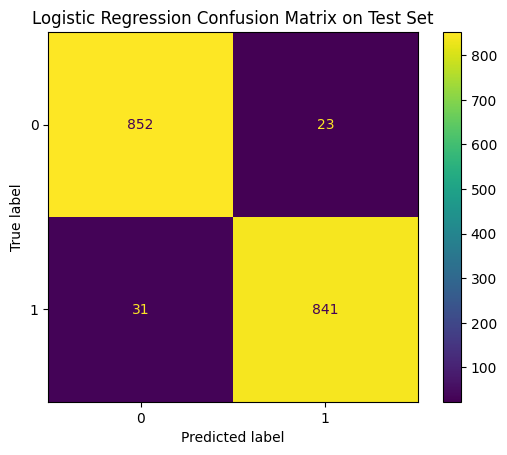

In [ ]:
lr_y_pred = lr.predict(X_test)
logistic_regression_confusion_matrix = confusion_matrix(y_test, lr_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=logistic_regression_confusion_matrix)
display.plot()
plt.title('Logistic Regression Confusion Matrix on Test Set')
plt.show()
# dt_y_pred = dt.predict(X_test)
# xgb_y_pred = xgb.predict(X_test)
# cb_y_pred = cb.predict(X_test)

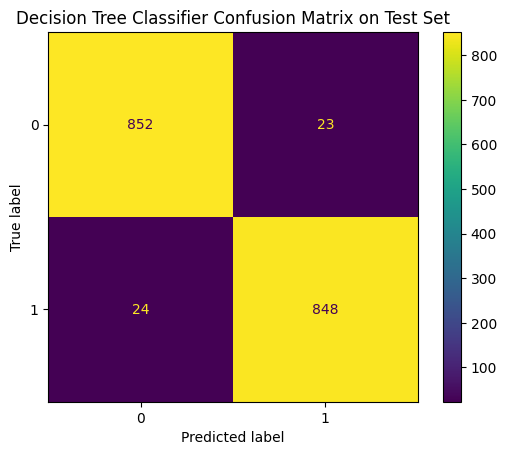

In [ ]:
dt_y_pred = dt.predict(X_test)
decission_classifier_confusion_matrix = confusion_matrix(y_test, dt_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=decission_classifier_confusion_matrix )
display.plot()
plt.title('Decision Tree Classifier Confusion Matrix on Test Set')
plt.show()

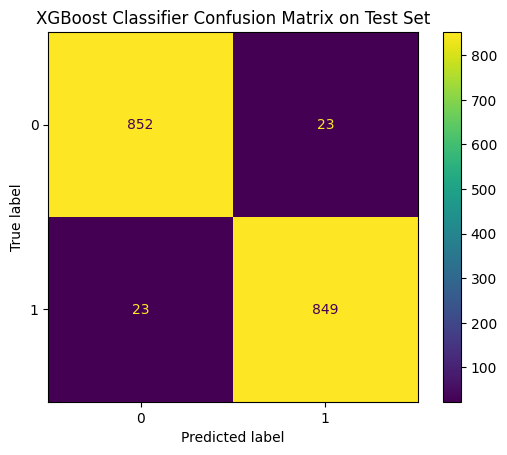

In [ ]:
xgb_y_pred = xgb.predict(X_test)
xgboost_classifier_confusion_matrix = confusion_matrix(y_test, xgb_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=xgboost_classifier_confusion_matrix )
display.plot()
plt.title('XGBoost Classifier Confusion Matrix on Test Set')
plt.show()

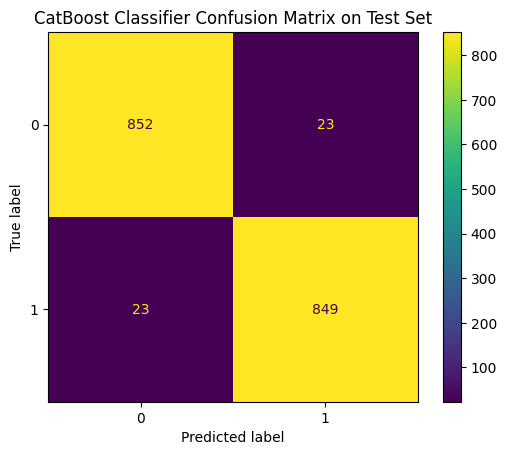

In [ ]:
cb_y_pred = cb.predict(X_test)
catboost_classifier_confusion_matrix = confusion_matrix(y_test, cb_y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=catboost_classifier_confusion_matrix)
display.plot()
plt.title('CatBoost Classifier Confusion Matrix on Test Set')
plt.show()

### Feature Importance

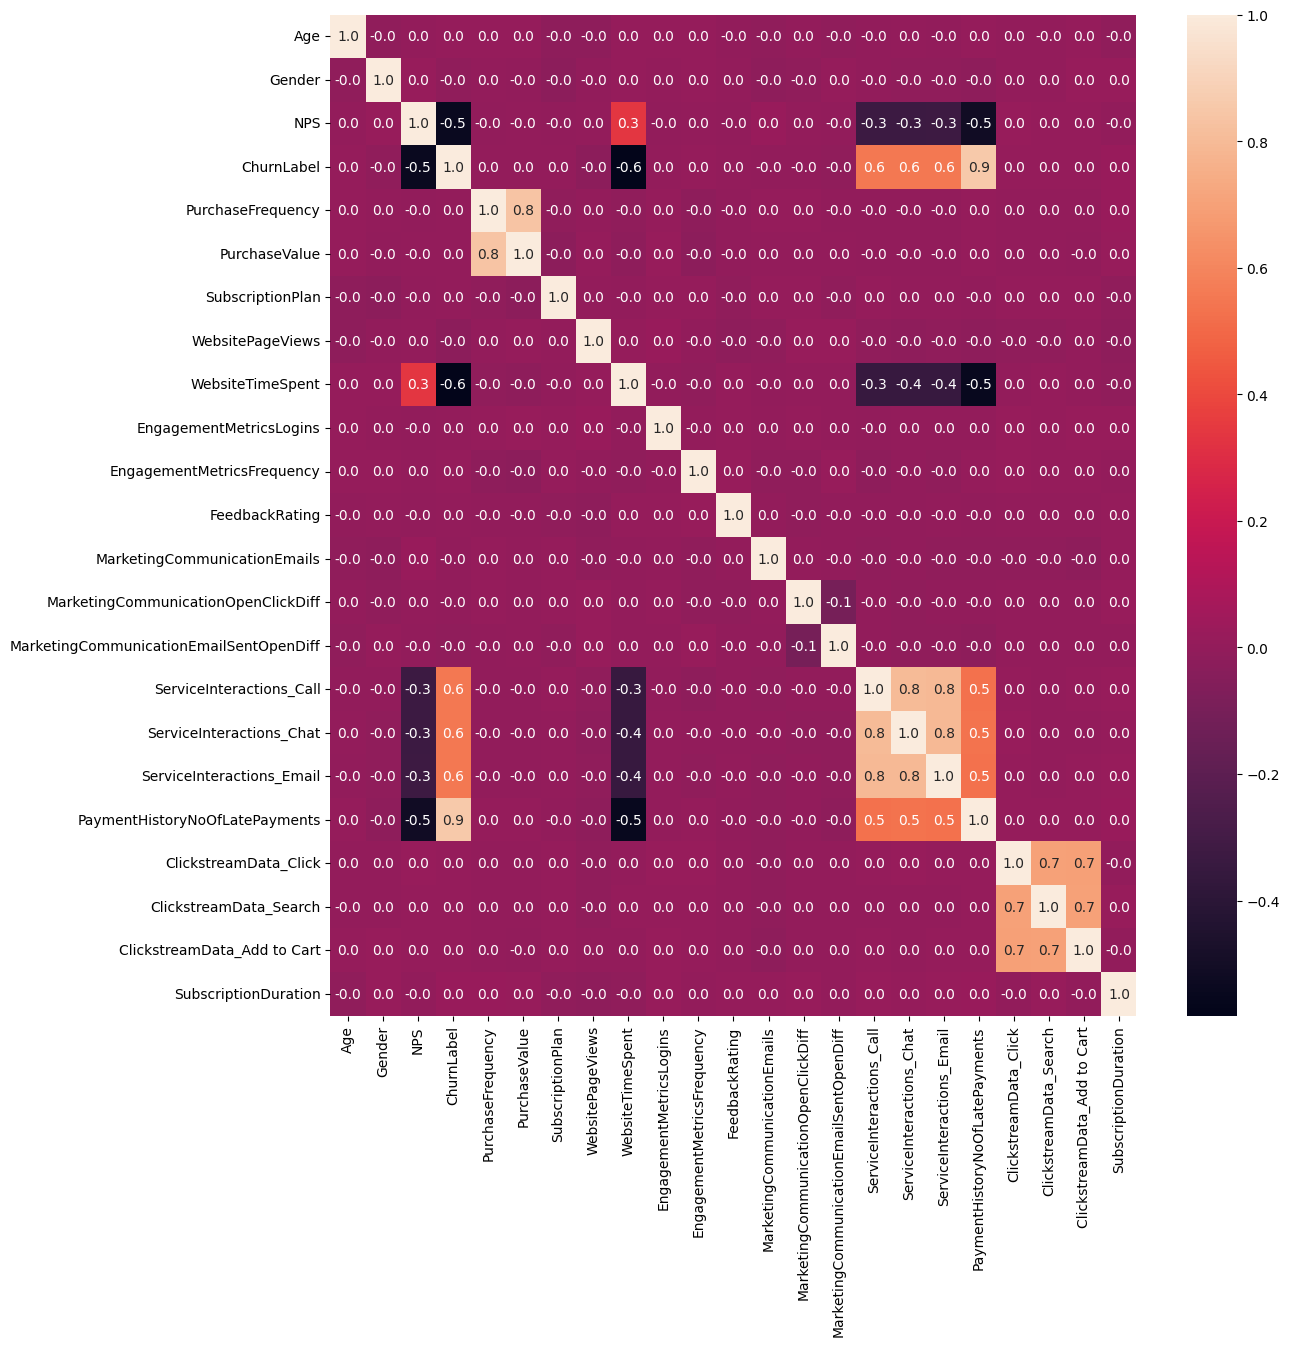

In [ ]:
df_corr = df_.corr()
fig,ax = plt.subplots(figsize=(13,13))
sns.heatmap(df_corr, annot=True,fmt='.1f',ax=ax)
plt.show()

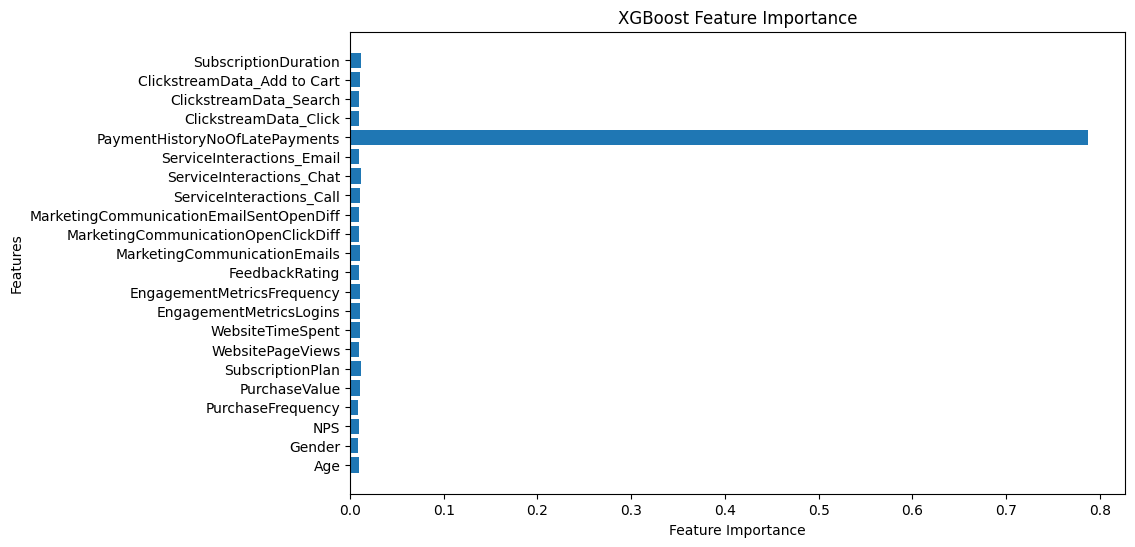

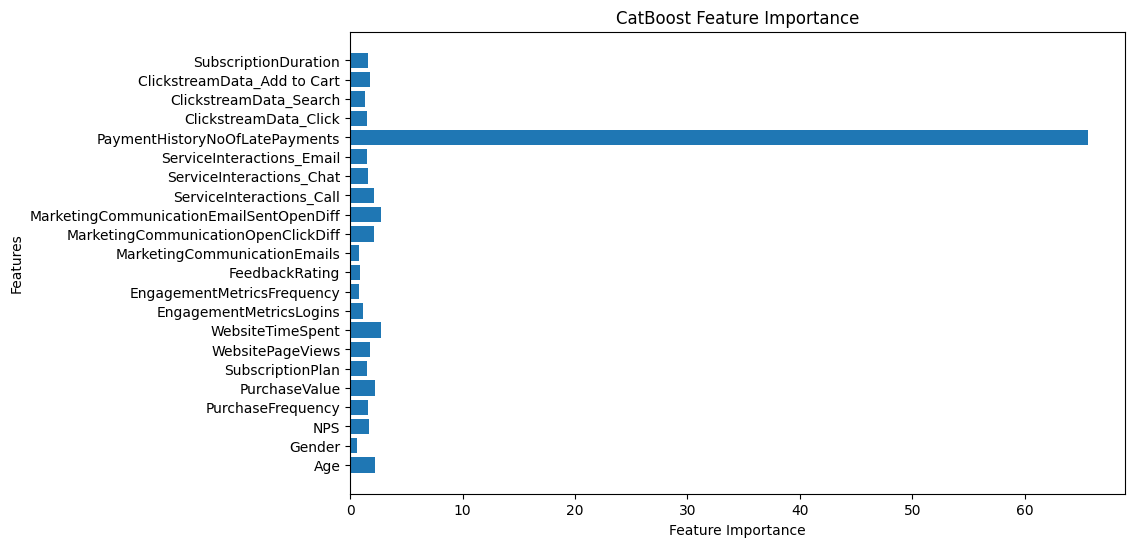

In [ ]:


import matplotlib.pyplot as plt
# Get feature importance from XGBoost
xgb_feature_importance = xgb.feature_importances_
# Get feature importance from CatBoost
cb_feature_importance = cb.feature_importances_

# Plot feature importance for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(X.columns, xgb_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

# Plot feature importance for CatBoost
plt.figure(figsize=(10, 6))
plt.barh(X.columns, cb_feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('CatBoost Feature Importance')
plt.show()


In [ ]:


import pandas as pd
# Get feature importance from XGBoost
xgb_feature_importance = xgb.feature_importances_
# Get feature importance from CatBoost
cb_feature_importance = cb.feature_importances_

# Create DataFrames for feature importances
xgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_feature_importance})
cb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': cb_feature_importance})

# Sort by importance and select top 10 features for each model
top_10_xgb = xgb_importance_df.sort_values(by='Importance', ascending=False).head(10)
top_10_cb = cb_importance_df.sort_values(by='Importance', ascending=False).head(10)

print("Top 10 Important Features from XGBoost:")
print(top_10_xgb)

print("\nTop 10 Important Features from CatBoost:")
print(top_10_cb)


Top 10 Important Features from XGBoost:
                           Feature  Importance
17  PaymentHistoryNoOfLatePayments    0.787629
15        ServiceInteractions_Chat    0.011985
5                 SubscriptionPlan    0.011529
21            SubscriptionDuration    0.011221
11    MarketingCommunicationEmails    0.011078
14        ServiceInteractions_Call    0.010567
9       EngagementMetricsFrequency    0.010518
20     ClickstreamData_Add to Cart    0.010294
7                 WebsiteTimeSpent    0.010292
8          EngagementMetricsLogins    0.010139

Top 10 Important Features from CatBoost:
                                    Feature  Importance
17           PaymentHistoryNoOfLatePayments   65.619769
13  MarketingCommunicationEmailSentOpenDiff    2.796570
7                          WebsiteTimeSpent    2.721383
0                                       Age    2.248222
4                             PurchaseValue    2.222754
14                 ServiceInteractions_Call    2.150533
12      M

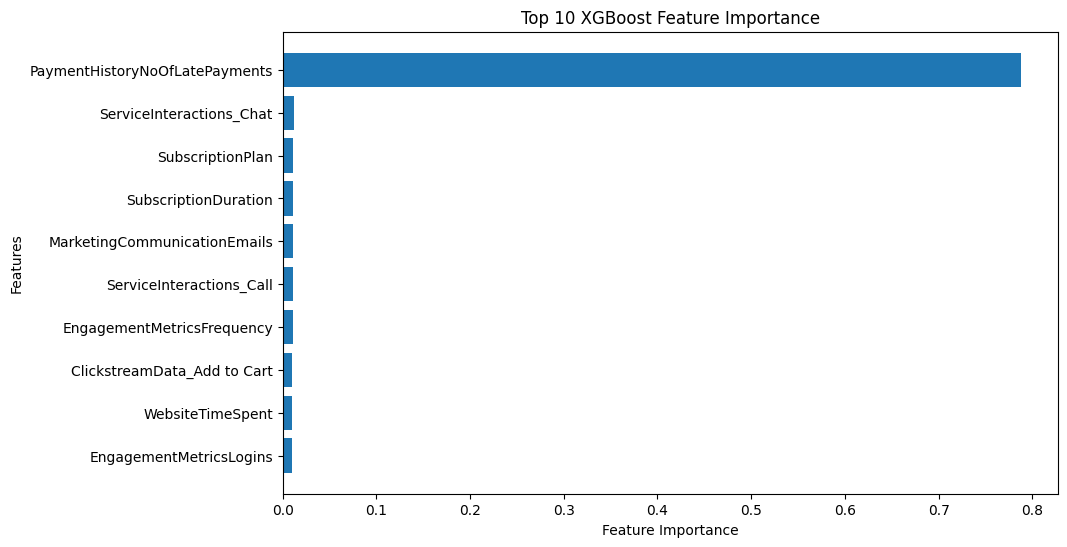

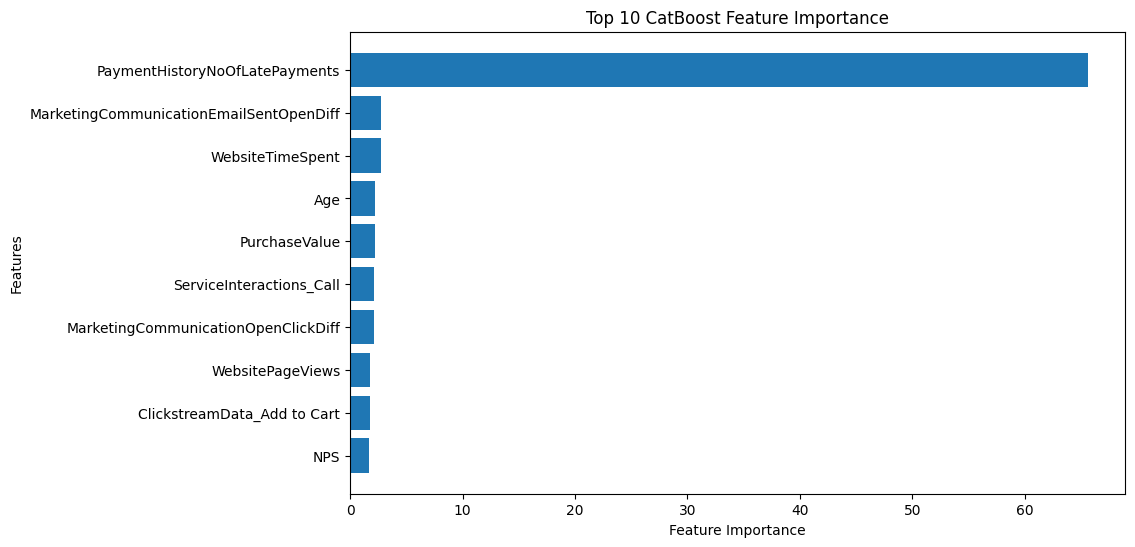

In [ ]:
# Visualise the top 10 most important features

import matplotlib.pyplot as plt
# Plot top 10 feature importances for XGBoost
plt.figure(figsize=(10, 6))
plt.barh(top_10_xgb['Feature'], top_10_xgb['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 XGBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.show()

# Plot top 10 feature importances for CatBoost
plt.figure(figsize=(10, 6))
plt.barh(top_10_cb['Feature'], top_10_cb['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 CatBoost Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.show()


### Conclusion and Recomendation

The most important features:

- PaymentHistoryNoOfLatePayments
- The number of service Interactionss the customer has had through Call, email, and Chat,
- The times spent on the company's website,
- The the Net Promter Score(NPS)
- CatBoost and XGBoost performed better than Decision Tree and Logistic Regression when identifying custormers that churned(High Number was predicted)
- CatBoost demonstrated an efficient way of visualizing important features than XGBoost in the project
- The most important feature is PaymentHistoryNoOfLatePayments,therefore, late payments from customers should be minimized as much as possible to prevent customers to churn in  the company

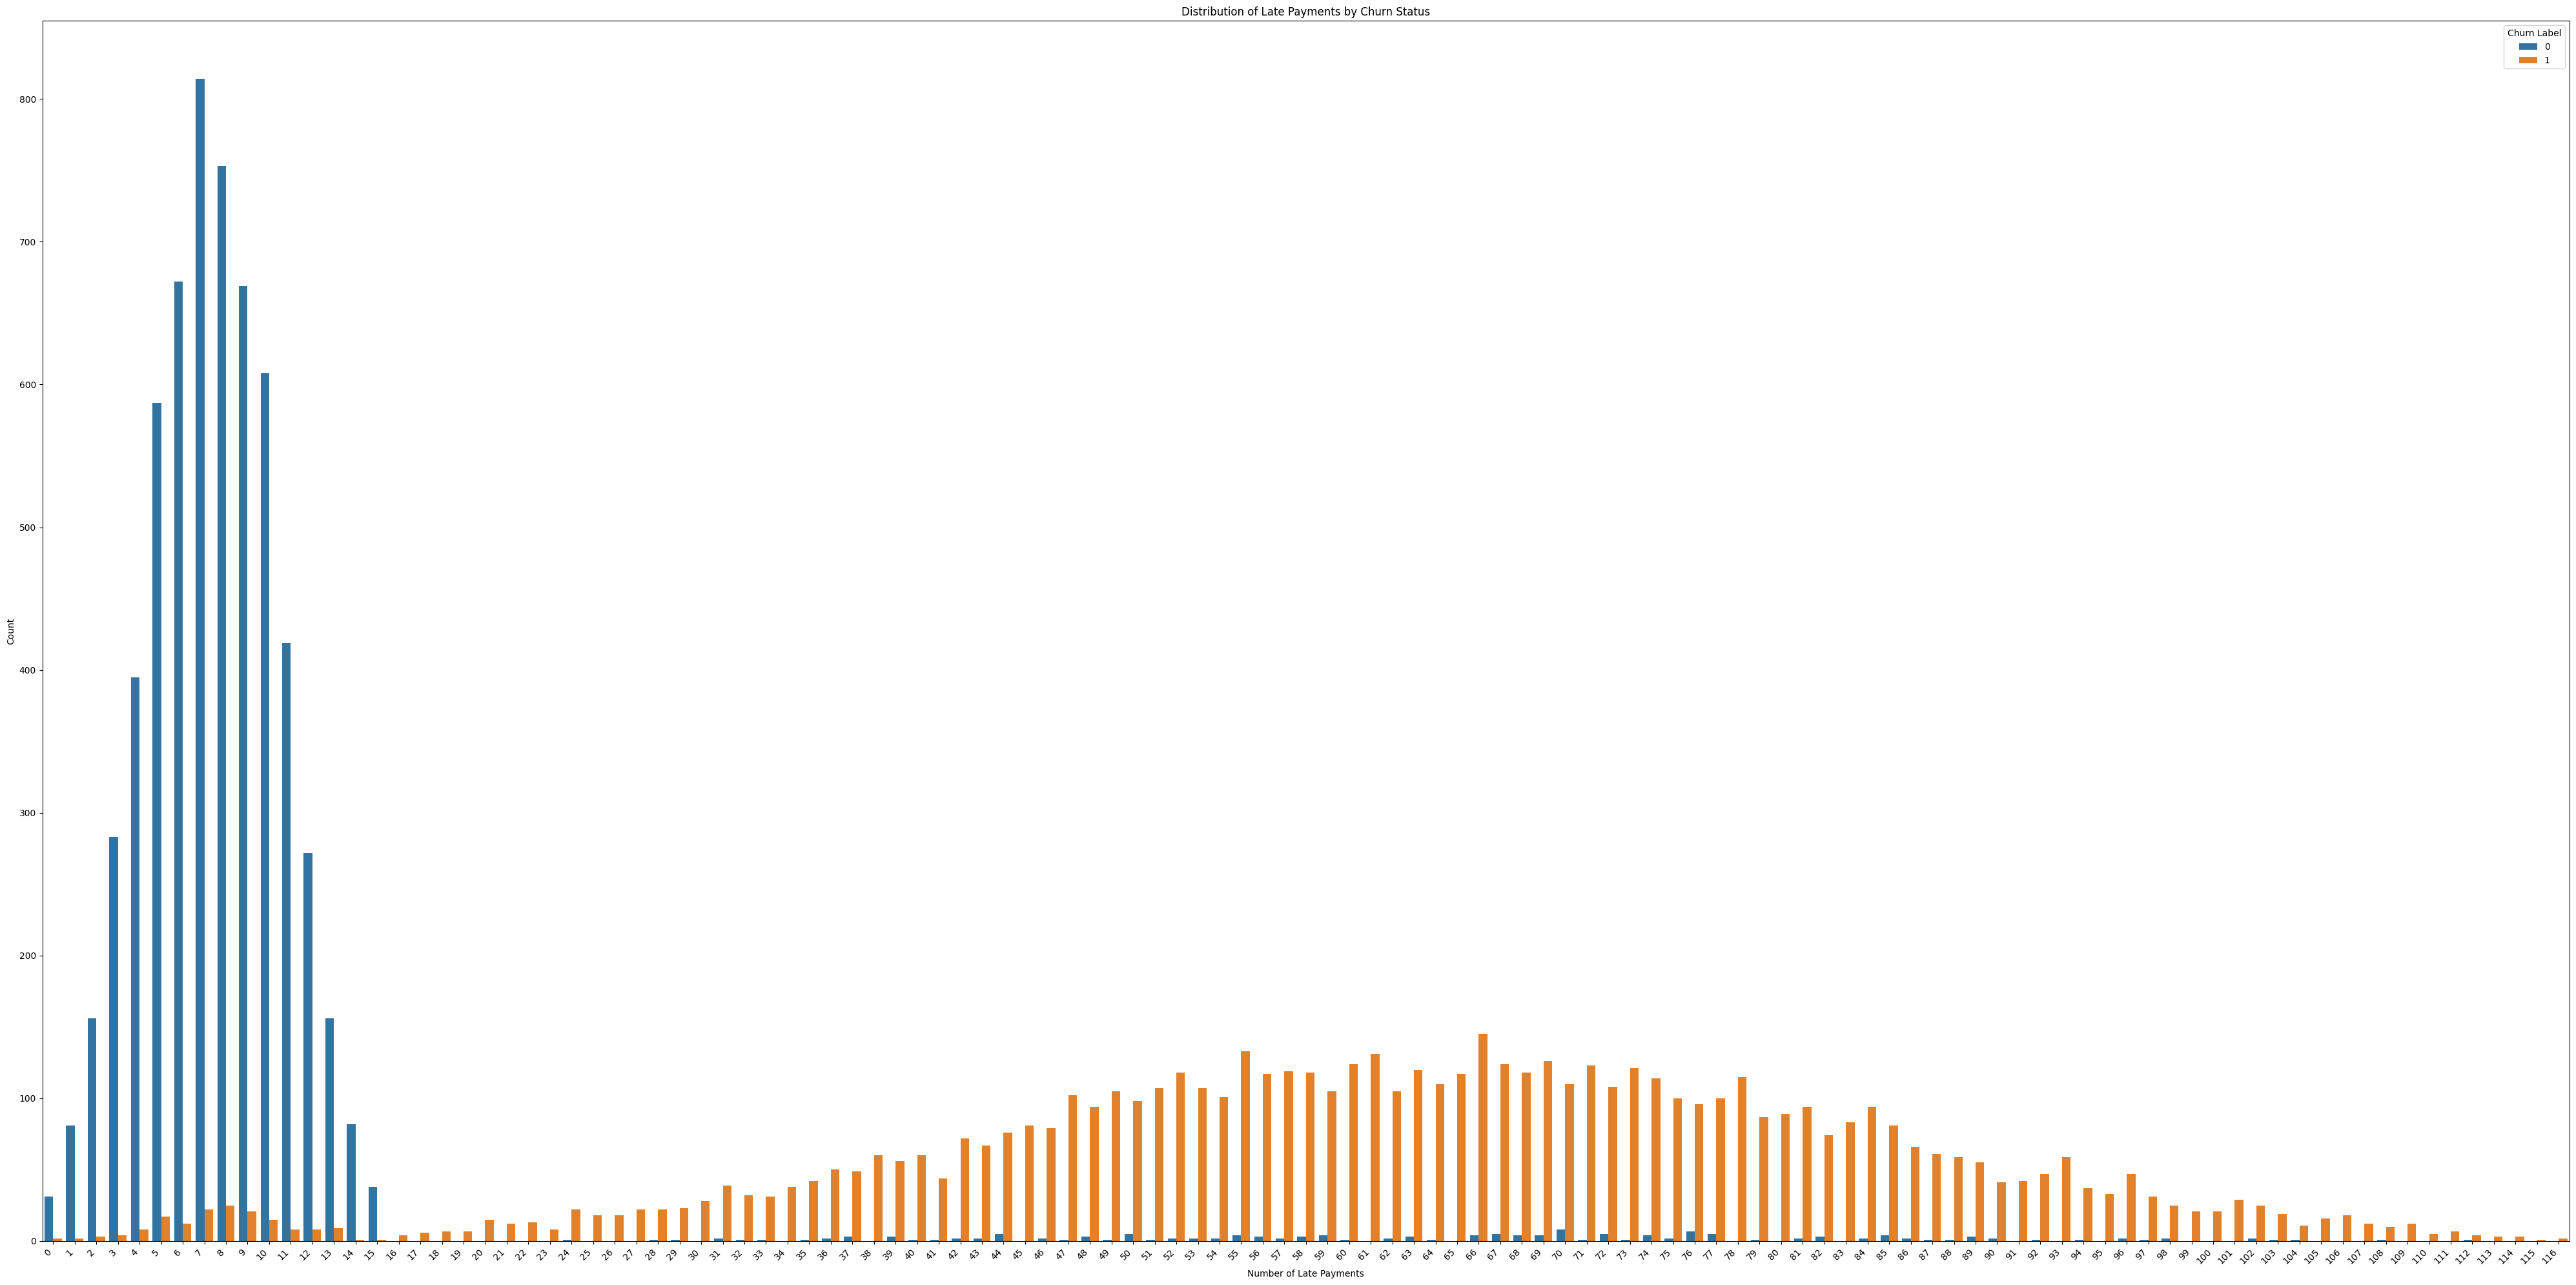

In [ ]:
# prompt: Adjust the above viz  breath fit the number

import matplotlib.pyplot as plt
plt.figure(figsize=(40, 20))
ax = sns.countplot(x='PaymentHistoryNoOfLatePayments', hue='ChurnLabel', data=df_)
plt.xlabel('Number of Late Payments')
plt.ylabel('Count')
plt.title('Distribution of Late Payments by Churn Status')
plt.legend(title='Churn Label')

# Adjust x-ticks to show all values
ax.set_xticks(range(df_['PaymentHistoryNoOfLatePayments'].nunique()))
ax.set_xticklabels(ax.get_xticks(), rotation=45, ha="right")  # Rotate labels if needed

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()
